In [1]:
import xarray as xr

In [21]:
ds = xr.open_dataset('/Users/tobias/Git/QBOSingapore/srv/qbo_singapore_fub.nc')
ds.close()

In [22]:
ds

<xarray.Dataset>
Dimensions:   (pressure: 15, time: 851)
Coordinates:
  * pressure  (pressure) int64 100 90 80 70 60 50 45 40 35 30 25 20 15 12 10
  * time      (time) datetime64[ns] 1953-01-01 1953-02-01 ... 2022-12-01
Data variables:
    u         (pressure, time) float64 ...
Attributes: (12/14)
    Conventions:               CF-1.8
    title:                     Monthly mean zonal winds
    history:                   Created by Tobias Kerzenmacher
    source:                    QBO data source
    comment:                   Monthly mean zonal winds at the levels 100, 90...
    institution:               Karlsruhe Institute of Technology (KIT), Insti...
    ...                        ...
    keywords:                  QBO, radiosonde, zonal wind
    frequency:                 1M
    creation_date:             2023-12-07_11-21-47
    further_info_url:          https://www.atmohub.kit.edu/english/807.php
    references:                Barbara Naujokat (1986) doi: https://doi.org/1...
    standard_name_vocabulary:  CF Standard Name Table, Version 83

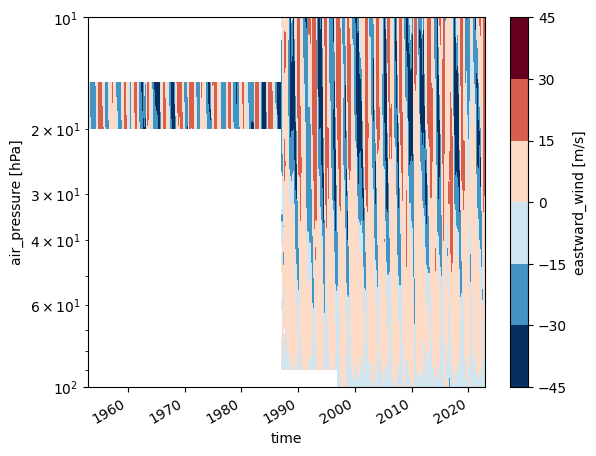

In [31]:
ds.u.plot.contourf(yscale='log', yincrease=False)

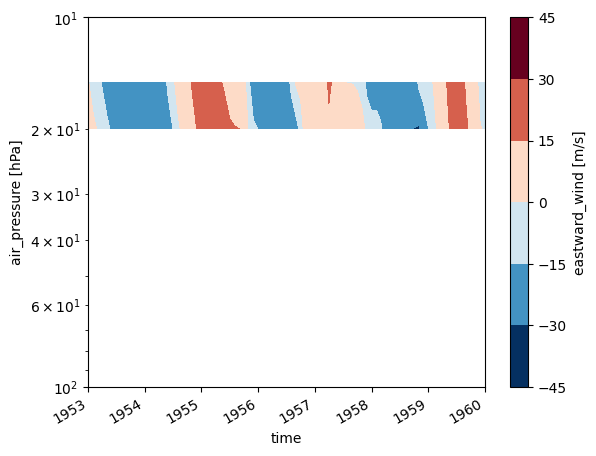

In [32]:
import pandas as pd
u_subset = ds.u.sel(time=slice(pd.to_datetime('1953-01-01T00:00:00.000000000'), pd.to_datetime('1960-01-01T00:00:00.000000000')))
# Plot the subset data
u_subset.plot.contour(yscale='log', yincrease=False)

In [33]:
start_time = '1953-01-01T00:00:00.000000000'
end_time = '1960-01-01T00:00:00.000000000'

# Create a boolean mask
time_mask = (ds.time >= start_time) & (ds.time <= end_time)

# Use the mask to select the subset data
u_subset = ds.u.where(time_mask)

UFuncTypeError: ufunc 'greater_equal' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.StrDType'>) -> <class 'numpy.dtypes.BoolDType'>

In [34]:
ax.imshow()

NameError: name 'ax' is not defined

In [49]:
ds.time

<xarray.DataArray 'time' (time: 850)>
array(['1953-01-01T00:00:00.000000000', '1953-02-01T00:00:00.000000000',
       '1953-03-01T00:00:00.000000000', ..., '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1953-01-01 1953-02-01 ... 2017-12-01
Attributes:
    standard_name:  time

In [71]:
time_coord = ds['time']
time_coord.index = time_coord.index.to_monotonic()
ds['time'] = time_coord


AttributeError: 'DataArray' object has no attribute 'index'

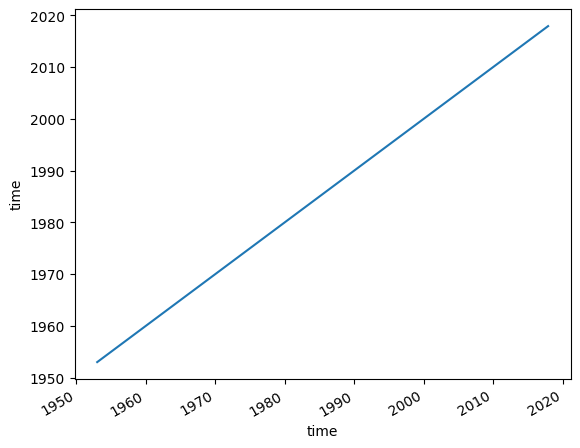

In [73]:
time_coord.plot()

In [59]:
ds.time

<xarray.DataArray 'time' (time: 850)>
array(['1953-01-01T00:00:00.000000000', '1953-02-01T00:00:00.000000000',
       '1953-03-01T00:00:00.000000000', ..., '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1953-01-01 1953-02-01 ... 2017-12-01
Attributes:
    standard_name:  time

In [70]:
ds_temp = ds.to_dataset()

AttributeError: 'Dataset' object has no attribute 'to_dataset'

In [79]:
ds_subset = ds.u.sel(time=slice('1953-01-01T00:00:00.000000000', '1960-12-01T00:00:00.000000000'))
ds_subset.plot.imshow(yscale='log', yincrease=False)

KeyError: "cannot represent labeled-based slice indexer for coordinate 'time' with a slice over integer positions; the index is unsorted or non-unique"

In [81]:
ds.time[0:3]

<xarray.DataArray 'time' (time: 3)>
array(['1953-01-01T00:00:00.000000000', '1953-02-01T00:00:00.000000000',
       '1953-03-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1953-01-01 1953-02-01 1953-03-01
Attributes:
    standard_name:  time